## Reto 4: Nltk FreqDist y Visualizaciones de NLP

### 1. Objetivos:
    - Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
    - Utilizar seaborn para visualizar los análisis estadísticos que visualicemos

---
    
### 2. Desarrollo:

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [1]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.probability import FreqDist
from nltk import ngrams

#leer dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Remoto amazon_fine_food_reviews-clean.csv')

In [2]:
#tokenizacion de reviews
nltk.download('punkt')
reviews=df['text'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#filtrado de palabras vacias
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
reviews=reviews.apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#filtrado simbolos y  numeros
reviews=reviews.apply(lambda x: [word for word in x if isinstance(word, str) and word.isalpha()])

In [7]:
#imprimir las palabras más comunes
reviews=reviews.explode()
freq_dist=FreqDist(reviews)
freq_dist.most_common(20)
comunes=freq_dist.most_common(20)

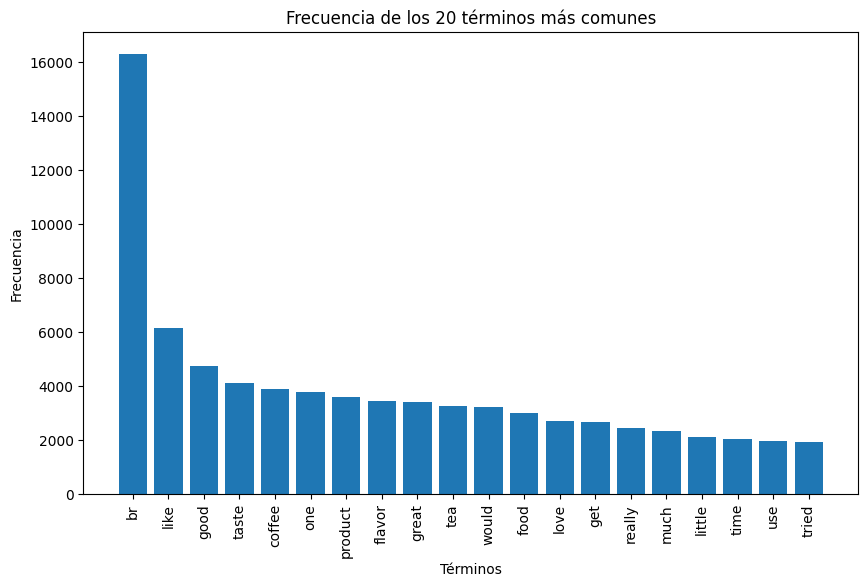

In [8]:
# Convert the list of tuples to a dictionary for plotting
comunes_dict = dict(comunes) # creates a dictionary from the list of (word, frequency) tuples


#grafica de barras verticales para frecuencia de las palabras
plt.figure(figsize=(10, 6))
plt.bar(comunes_dict.keys(), comunes_dict.values()) # Access keys and values from the dictionary
plt.xticks(rotation=90)
plt.title("Frecuencia de los 20 términos más comunes")
plt.xlabel("Términos")
plt.ylabel("Frecuencia")
plt.show()

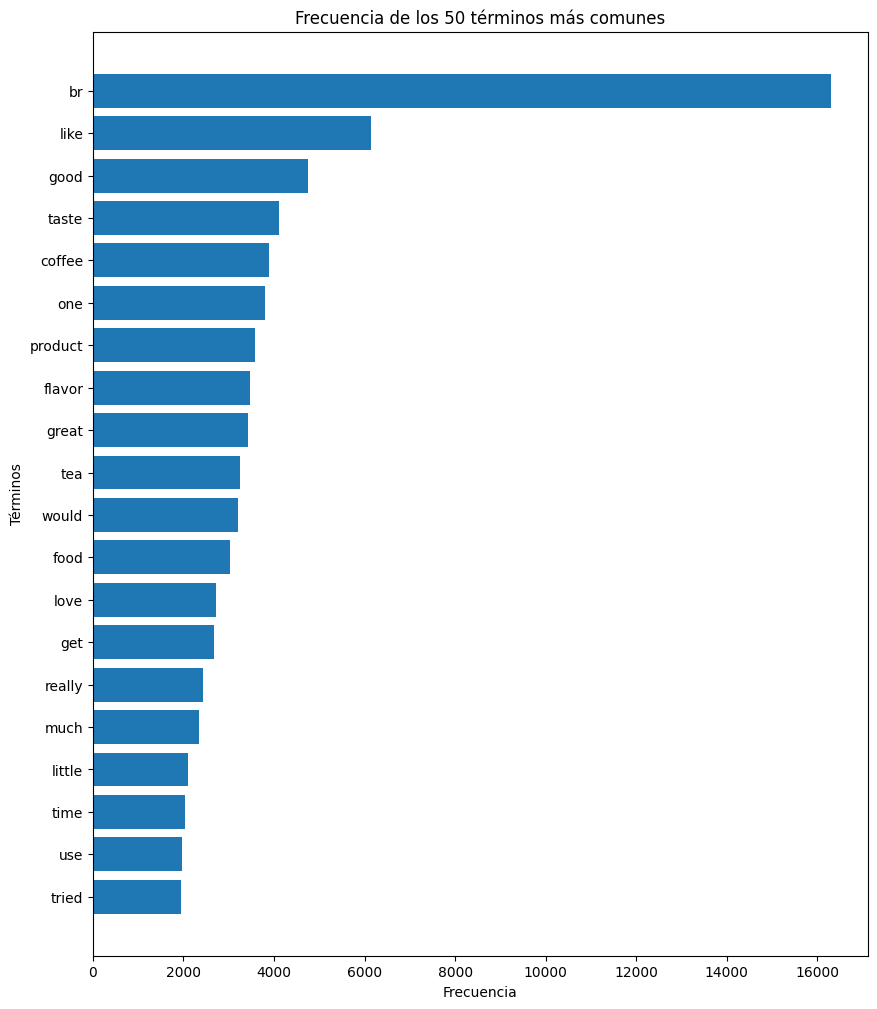

In [9]:
#grafica horizontal con 50 palabras mas comunes
plt.figure(figsize=(10, 12))
# Seleccionamos los 50 términos más comunes del diccionario
top_50_items = dict(list(comunes_dict.items())[:50])

# Graficamos una barra horizontal
plt.barh(list(top_50_items.keys()), list(top_50_items.values()))
plt.title("Frecuencia de los 50 términos más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Términos")
plt.gca().invert_yaxis()  # Invertimos el eje Y para que el más frecuente esté arriba
plt.show()


In [14]:
from nltk.probability import FreqDist

# Suponiendo que reviews es una lista de palabras
freq_dist = FreqDist(reviews)

# Filtrar palabras con al menos 10 caracteres y una frecuencia mínima de 7
filtered_words = [word for word, count in freq_dist.items() if len(word) >= 10 and count >= 7]

# Mostrar los resultados
print(filtered_words)


['individual', 'information', 'ingredients', 'misleading', 'ingredient', 'percentage', 'absolutely', 'difference', 'completely', 'differently', 'ridiculous', 'complaints', 'additional', 'grandmother', 'chocolatey', 'disappointed', 'definitely', 'everything', 'especially', 'interested', 'activities', 'functional', 'supermarket', 'nutritious', 'aftertaste', 'delightful', 'introduced', 'Decaffeinated', 'Unfortunately', 'incredible', 'production', 'particularly', 'purchasing', 'experience', 'constipation', 'frequently', 'apparently', 'discovered', 'Purrfectly', 'nutritional', 'particular', 'Thanksgiving', 'antibiotics', 'considering', 'understand', 'attractive', 'competitive', 'transaction', 'flavorless', 'equivalent', 'artificial', 'preservatives', 'strawberry', 'strawberries', 'preventing', 'bitterness', 'conclusion', 'officially', 'sensitivities', 'everywhere', 'underneath', 'refrigerated', 'alternative', 'experiences', 'advertised', 'subscription', 'consumption', 'discovering', 'presen

Text(0.5, 0, 'Número de palabras')

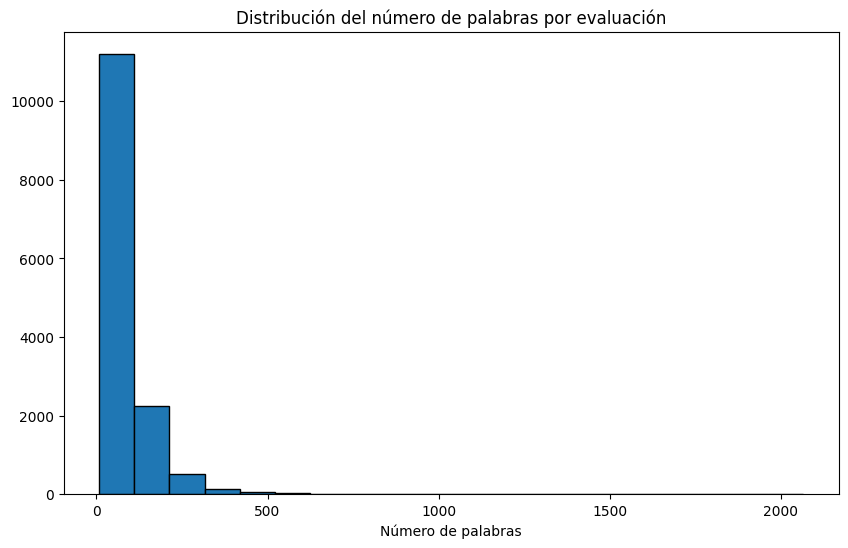

In [16]:
#histograma del número de palabras contenidas en cada evaluación
word_counts = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, edgecolor='black')
plt.title('Distribución del número de palabras por evaluación')
plt.xlabel('Número de palabras')

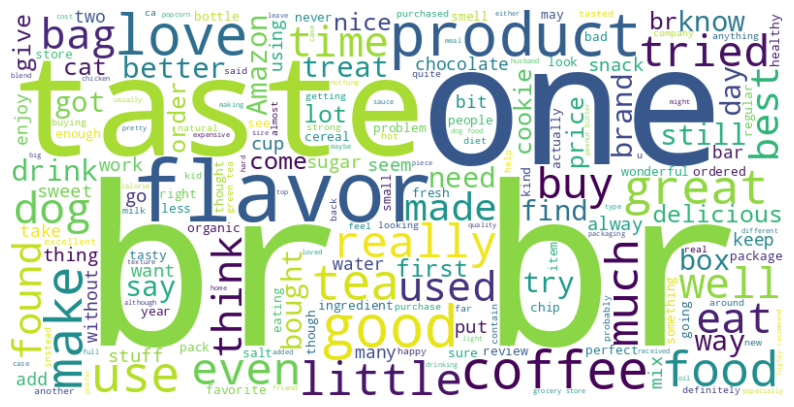

In [18]:
#nube de palabras
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.